# Import Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt
import matplotlib
#set a standard size for figures
matplotlib.rcParams['figure.figsize'] = (14, 8)

In [8]:
#sets the default options for viewing pandas dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [9]:
path = '/Users/dmitriykats/Documents/SpringBoard/Springboard/Capstone2/true_review/data/'

In [10]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [12]:
#drop the bus_id columns, it's a duplicated of business_id
df = df.drop(columns='bus_id')

In [13]:
df['weekday'] = df.date.apply(lambda x: x.weekday())

In [14]:
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)

In [15]:
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

In [322]:
df.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
0,DUfWxxewcJgGcc1Y189XSQ,ZcAoKSDT6BNcWsn3o4-WVA,2,2017-01-07,Cool place packed to the rafters. Menu is pret...,1,0,0,"""Me & Julio""",NaN,"""2784 S Fish Hatchery Rd""",Fitchburg,WI,53711,43.005728,-89.427154,3.0,102,1,Restaurants;Mexican;Tex-Mex;American (Traditio...,5,369,2017
1,oAJf-_URH4QBMs2ZMpjUyA,9VhZRkmyoEho58vmnMh_Hg,3,2016-04-11,"I've had mixed experiences at this Montana's, ...",0,0,0,"""Montana's BBQ & Bar""",NaN,"""8735 Yonge St""",Richmond Hill,ON,L4C 6Z1,43.840823,-79.428224,3.0,49,1,Comfort Food;Restaurants;American (Traditional...,0,524,2016
2,SOb8RgcqBGbwlq9LZXy3fQ,IgOaTag1zhIXndxngP0M3w,1,2016-09-21,Die Angaben hier sind leider nicht mehr ganz k...,0,0,0,"""Restaurant Ganesha""",NaN,"""Auberlenstr. 40""",Fellbach,BW,70736,48.818648,9.270925,3.0,8,1,Restaurants;Indian,2,125,2016
3,Iwe-xN6dnugdZ0KiQjO6Hg,Fvd8qeJCXFbMYQk45S7iBQ,5,2014-06-30,My family came in while waiting for our time a...,0,0,0,"""Las Fuentes Mexican Grill""",NaN,"""13621 N Litchfield Rd""",Surprise,AZ,85374,33.607472,-112.355941,3.5,151,1,Mexican;Restaurants,0,256,2014
4,VSCpdfEtjdWjTbBVKMb5eA,mF2EW3twSrFPmT_RVV1-Qg,2,2011-11-18,I would not recommend this place for Chinese f...,3,5,0,"""House of Hunan""",NaN,"""18 Public Sq""",Medina,OH,44256,41.138544,-81.864299,3.0,83,1,Restaurants;Chinese,4,992,2011


### Looking at Checkins

In [10]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')

In [11]:
df_check.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


### Users and their friends

In [27]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])

In [28]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [29]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null datetime64[ns]
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny 

In [30]:
#filter the friends dataframe to only include users with friends
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)
df_friends = df_friends.dropna()

In [32]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1


In [120]:
#Further filter the dataframe to only include users with over 200 reviews
df_power_user = df_friends[df_friends.review_count > 200]

In [34]:
df_power_user['num_friends'] = df_power_user.friends.apply(lambda x: x.count(',') + 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_power_user['year'] = df_power_user.yelping_since.apply(lambda x: x.year)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_power_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1,332,2008
212,wm97KC6G0resSDXTmNIMKw,Dwain,1262,2012-06-08,"j7W6t1Bjb3H1vCTtk3wiCA, Tnl7W-J1JvlU1sDA3C5M3g...",319,295,296,57,None,4.15,15,14,5,4,2,37,161,94,94,30,42,1153,2012
414,snDjs1hdh7JOWv4jjbXPDw,Michael,447,2008-11-19,"uIjj7EIVBU4kGNgmKPO02A, kroQYWSj-BhIEXT4VwLRHA...",35,36,7,13,"2015, 2013, 2014, 2017, 2016",3.86,23,3,2,0,0,11,25,22,22,17,3,201,2008
544,bBRPy8zUvNc0NGbGmkjrZg,Jan,462,2009-03-30,"T78RIzZ3VPQ9C8njU_VIuA, gxSDEZYcRn_uFWZzQCDKrA...",2166,1853,1681,95,"2012, 2011, 2013, 2010",4.00,599,138,151,120,92,221,466,764,764,279,197,1878,2009
655,37Hc8hr3cw0iHLoPzLK6Ow,Christine,496,2008-03-03,"duEhqH-mtI4qIyIh3NCn9A, Sndz5pnHkoCRsxS7vRkMNw...",24,38,24,46,"2011, 2010, 2009, 2012",3.72,248,19,32,16,15,76,131,310,310,98,44,531,2008


# Simple Recommender (Pittsburgh Data)

In [38]:
pit = df[df.city == 'Pittsburgh']

In [39]:
print(f'Number of Users: {pit.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {pit.business_id.unique().shape[0]}')
print(f'Number of Reviews: {pit.text.unique().shape[0]}')

Number of Users: 41518
Number of Restaurants: 2031
Number of Reviews: 122472


In [40]:
#get a list of users that in Pittsburgh and a list of their friends
pit_users = list(pit.user_id.unique())
pit_friends = df_power_user[df_power_user.user_id.isin(pit_users)]

In [172]:
pit_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
952,YGBhHN84Mo7cHWjqZx7ipg,Bill,293,2015-06-23,"8jua1Oqzs0zy7NLg5FfupQ, RAN_Kfnk_3LYDE5XLjlACQ...",19,0,0,1,2017,3.72,0,0,0,0,0,0,1,0,0,0,0,7,2015
979,D8PJTlkMlwAyDjow3pup_Q,Lexy,249,2007-03-19,"gdq1Q20oMJ49wzp50Je6sQ, 1YLS2vpOoSgcvPHqQYySRw...",27,15,20,13,None,3.65,2,1,0,0,0,1,2,9,9,2,0,130,2007
1260,TjIGlS1P_LAOyk_XHlXGzQ,Nicole,323,2012-07-16,"btUiQSFlLa6MQzqmtGAFtQ, G5t5oZyMmarIv-wSBPEhLQ...",47,3,0,13,"2014, 2016, 2015",3.82,2,0,1,0,0,4,2,2,2,0,0,233,2012
1292,0Pj91NFPtXWeIDaLp2kuyw,Zack,422,2010-02-22,"jbD_-U96bBoBkzDli8CfPA, CnqsywaRwy2QEqsiey0AXA...",72,25,32,20,"2017, 2012, 2015, 2011, 2014, 2013, 2016",3.64,19,5,1,0,0,12,19,27,27,12,2,56,2010
1339,s2c7-9bqMhjA8POuKIHm8g,Alicia,880,2007-01-17,"kSyhGgF0uuFDleLcgyTSgw, nn6sZelGNozPYRwu_PzVgQ...",1778,722,2013,124,"2007, 2016, 2012, 2011, 2010, 2008, 2014, 2013...",3.83,927,79,71,75,62,627,677,1067,1067,159,317,428,2007


In [55]:
pit_power_users = list(pit_friends.user_id.unique())

In [56]:
len(pit_power_users)

1887

In [41]:
print(f'Number of Users that have friends: {pit_friends.user_id.unique().shape[0]}')

Number of Users that have friends: 1887


In [42]:
pit['split_categories'] = pit['categories'].str.split(';')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
stops = ['Restaurants','Nightlife','Food']

In [44]:
pit['split_categories'] = pit.split_categories.apply(lambda x: [i for i in x if i not in stops])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
category_lists = list(pit.split_categories)

In [46]:
#combine list of list of categories
import itertools
categories = list(itertools.chain.from_iterable(category_lists))

In [47]:
#remove duplicate categories
categories = list(dict.fromkeys(categories))

In [48]:
#get a list of top 75 tagged categories for restaurants in Pheonix (not including:
#Restaurants, Nightlife, or Food).
cat_df = pd.DataFrame(pit.groupby(['business_id','categories','bus_stars']).size())
cat_df = cat_df.reset_index()
cat_split = cat_df['categories'].str.split(';', expand=True)
cat_split = cat_split.replace(to_replace=['Restaurants','Nightlife','Food'], value=np.nan)
top_75_cat = list(cat_split.stack().value_counts(ascending=False)[0:75].keys())

In [50]:
pit[top_75_cat] = pd.DataFrame([[0] * len(top_75_cat)], index=pit.index)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [51]:
pit.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
272365,Wrt6maH_llebYESCVX-JjQ,wUr4HeEhhPeiFb7UmiYRzg,2,2014-09-12,They need to speed up their food prep time or ...,1,0,0,"""Chick'n Bubbly""",Oakland,"""117 Oakland Ave""",Pittsburgh,PA,15213,40.441918,-79.957192,4.0,111,1,Korean;Bubble Tea;Chicken Wings;Food;Coffee & ...,4,154,2014,"[Korean, Bubble Tea, Chicken Wings, Coffee & Tea]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272366,pTBL-Wq-PPcTnkb3mffIIA,wDWKQR2psTIj4BZ0mf01Gg,5,2012-12-08,This restaurant is a real treat. Crab cakes we...,0,0,0,"""Willow Restaurant""",NaN,"""634 Camp Horne Rd""",Pittsburgh,PA,15237,40.521040,-80.076656,4.0,117,1,American (New);Restaurants,5,183,2012,[American (New)],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272367,4m9NXICYBC5i9t4aTt-I6w,CFtZH4Skp9z3o4ToSywI4w,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,"""BRGR""",Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272368,H7pj7sbXY3N-WSEwa-JfpA,YzqV61exMv__mjobBV2g7g,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,"""Thai Cuisine""",Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272369,9gdRV2jTbSaKly1GRD7tfQ,A4kCvILTgfr_2cG0_yGNiw,5,2017-11-19,Soo Doo Buu and seafood pancake are really goo...,0,0,0,"""Green Pepper""",Squirrel Hill,"""2020 Murray Ave""",Pittsburgh,PA,15217,40.434176,-79.922987,3.5,129,1,Nightlife;Korean;Karaoke;Restaurants,6,109,2017,"[Korean, Karaoke]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
for cat in top_75_cat:
    pit[cat] = pit.split_categories.apply(lambda x: 1 if cat in x else 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
pit.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
272365,Wrt6maH_llebYESCVX-JjQ,wUr4HeEhhPeiFb7UmiYRzg,2,2014-09-12,They need to speed up their food prep time or ...,1,0,0,"""Chick'n Bubbly""",Oakland,"""117 Oakland Ave""",Pittsburgh,PA,15213,40.441918,-79.957192,4.0,111,1,Korean;Bubble Tea;Chicken Wings;Food;Coffee & ...,4,154,2014,"[Korean, Bubble Tea, Chicken Wings, Coffee & Tea]",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272366,pTBL-Wq-PPcTnkb3mffIIA,wDWKQR2psTIj4BZ0mf01Gg,5,2012-12-08,This restaurant is a real treat. Crab cakes we...,0,0,0,"""Willow Restaurant""",NaN,"""634 Camp Horne Rd""",Pittsburgh,PA,15237,40.521040,-80.076656,4.0,117,1,American (New);Restaurants,5,183,2012,[American (New)],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272367,4m9NXICYBC5i9t4aTt-I6w,CFtZH4Skp9z3o4ToSywI4w,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,"""BRGR""",Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272368,H7pj7sbXY3N-WSEwa-JfpA,YzqV61exMv__mjobBV2g7g,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,"""Thai Cuisine""",Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272369,9gdRV2jTbSaKly1GRD7tfQ,A4kCvILTgfr_2cG0_yGNiw,5,2017-11-19,Soo Doo Buu and seafood pancake are really goo...,0,0,0,"""Green Pepper""",Squirrel Hill,"""2020 Murray Ave""",Pittsburgh,PA,15217,40.434176,-79.922987,3.5,129,1,Nightlife;Korean;Karaoke;Restaurants,6,109,2017,"[Korean, Karaoke]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [306]:
pit_power = pit[pit.user_id.isin(pit_power_users)]

In [307]:
pit_power.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
272367,4m9NXICYBC5i9t4aTt-I6w,CFtZH4Skp9z3o4ToSywI4w,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,"""BRGR""",Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272368,H7pj7sbXY3N-WSEwa-JfpA,YzqV61exMv__mjobBV2g7g,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,"""Thai Cuisine""",Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272377,0EhPIlDozxGKpbbHRr6vZg,dAcaMSkrpYUZocqrLvOzRQ,5,2016-10-28,Craving Mexican? Check out this tasty spot in ...,6,2,3,"""Los Cabos Mexican Restaurant""",Bloomfield,"""4108-10 Penn Ave""",Pittsburgh,PA,15224,40.465539,-79.954581,3.5,115,1,Restaurants;Mexican,4,1012,2016,[Mexican],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272380,GsFr15zUG8wO9fsSHwvZUw,xcmmTXhuMx2fZF2Bt69F4w,1,2014-09-20,Back one more time to see if anything had chan...,1,0,0,"""Point Brugge Café""",Point Breeze,"""401 Hastings St""",Pittsburgh,PA,15206,40.450042,-79.913901,4.5,514,1,Belgian;French;German;Restaurants,5,812,2014,"[Belgian, French, German]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272381,r4_XcrRt08sADOdIT5ex3A,w_UCGMgok7N9p0XdYBx1VQ,2,2015-06-24,"Stopped in here on a drive home from Sandusky,...",0,0,0,"""Primanti Bros""",Downtown,"""2 S Market Sq""",Pittsburgh,PA,15222,40.440287,-80.002585,3.5,604,1,Sandwiches;American (New);Nightlife;Restaurant...,2,776,2015,"[Sandwiches, American (New), Bars, Sports Bars...",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
pit.to_csv('pit_data.csv', encoding='utf-8')

## Predicting using similarities

In [3]:
pit = pd.read_csv('pit_data.csv', parse_dates=['date'])

In [4]:
pit = pit.drop(columns='Unnamed: 0')

In [158]:
n_users = pit_power.user_id.unique().shape[0]
n_rests = pit_power.business_id.unique().shape[0]

In [159]:
pit_power_encoded = pit_power.copy()

In [160]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
pit_power_encoded['user_id'] = le.fit_transform(pit_power_encoded.user_id.values)
pit_power_encoded['business_id'] = le.fit_transform(pit_power_encoded.business_id.values)

In [161]:
pit_power_encoded.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
272367,168,371,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,"""BRGR""",Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272368,512,972,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,"""Thai Cuisine""",Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272377,39,1126,5,2016-10-28,Craving Mexican? Check out this tasty spot in ...,6,2,3,"""Los Cabos Mexican Restaurant""",Bloomfield,"""4108-10 Penn Ave""",Pittsburgh,PA,15224,40.465539,-79.954581,3.5,115,1,Restaurants;Mexican,4,1012,2016,[Mexican],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272380,507,1726,1,2014-09-20,Back one more time to see if anything had chan...,1,0,0,"""Point Brugge Café""",Point Breeze,"""401 Hastings St""",Pittsburgh,PA,15206,40.450042,-79.913901,4.5,514,1,Belgian;French;German;Restaurants,5,812,2014,"[Belgian, French, German]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272381,1613,1689,2,2015-06-24,"Stopped in here on a drive home from Sandusky,...",0,0,0,"""Primanti Bros""",Downtown,"""2 S Market Sq""",Pittsburgh,PA,15222,40.440287,-80.002585,3.5,604,1,Sandwiches;American (New);Nightlife;Restaurant...,2,776,2015,"[Sandwiches, American (New), Bars, Sports Bars...",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
data_matrix = np.zeros((n_users, n_rests))
for line in pit_power_encoded.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In [163]:
data_matrix.shape

(1887, 1789)

In [65]:
import scipy

In [66]:
from sklearn.metrics.pairwise import pairwise_distances 

In [67]:
data_matrix = scipy.sparse.csr_matrix(data_matrix)

In [68]:
user_similarity = pairwise_distances(data_matrix, metric='cosine')

In [69]:
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [110]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating)
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [111]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [112]:
user_prediction

matrix([[-0.00604296,  0.00102874, -0.00916227, ..., -0.00478679,
         -0.00932404,  0.01346877],
        [-0.01271642, -0.00591573, -0.01576146, ..., -0.01164287,
         -0.01576146,  0.00644187],
        [-0.0106107 , -0.00339377, -0.01372728, ..., -0.00931164,
         -0.0137308 ,  0.0088357 ],
        ...,
        [-0.01134016, -0.00465068, -0.01461257, ..., -0.01059934,
         -0.01461257,  0.00713665],
        [-0.00240888,  0.00393899, -0.00557697, ..., -0.00136883,
         -0.00568935,  0.01596604],
        [-0.00941093, -0.00232537, -0.01258957, ..., -0.00832027,
         -0.01258957,  0.00984359]])

In [18]:
item_prediction

array([[0.0049565 , 0.00483171, 0.00484942, ..., 0.00493934, 0.00484975,
        0.00484793],
       [0.00499293, 0.0050227 , 0.0050071 , ..., 0.00492922, 0.00494886,
        0.00496885],
       [0.0038854 , 0.00389904, 0.00378498, ..., 0.00382682, 0.00395909,
        0.00394747],
       ...,
       [0.00049929, 0.00050227, 0.00050071, ..., 0.00049585, 0.00047998,
        0.00049863],
       [0.0029849 , 0.00299372, 0.00293935, ..., 0.00292053, 0.00296591,
        0.00298507],
       [0.00499293, 0.00497066, 0.00490997, ..., 0.00480152, 0.0049274 ,
        0.00498633]])

## Recommendation using means

In [262]:
#simple recommender using collaborative mean (collaborative mean should be very close to Yelp Rating)
def collab_mean(user_id, business_id):
    #make sure not to consider input user
    user_condition = phx.user_id != user_id
    #index into all ratings for the business_id
    rest_condition = phx.business_id == business_id
    
    ratings_by_others = phx.loc[user_condition & rest_condition]
    if ratings_by_others.empty:
        return 3.0
    else: 
        return ratings_by_others.rev_stars.mean()
    
    
#test on single user / restaurant combination   
user = 'sSxVSRgH1nXTijHdeApynw'
rest = 'prdA1r8XP03oD-PYvZJ5AA'     
print(f"Predicted Rating: {collab_mean(user, rest)}")
print(f"User Actual Rating: {(phx[(phx.user_id == user) & (phx.business_id == rest)]).rev_stars.iloc[0]}")
print(f"Yelp Rating: {phx[phx.business_id == rest].bus_stars.iloc[0]}")


Predicted Rating: 2.917525773195876
User Actual Rating: 1
Yelp Rating: 3.0


In [261]:
#simple recommender using content mean (content mean should be same as user's average rating)
def content_mean(user_id, business_id):
    user_condition = phx.user_id == user_id
    return phx.loc[user_condition, 'rev_stars'].mean()


#test on single user / restaurant combination
user = 'sSxVSRgH1nXTijHdeApynw'
rest = 'prdA1r8XP03oD-PYvZJ5AA' 
print(f"Predicted Rating: {content_mean(user, rest)}")
print(f"User Actual Rating: {(phx[(phx.user_id == user) & (phx.business_id == rest)]).rev_stars.iloc[0]}")
print(f"Yelp Rating: {phx[phx.business_id == rest].bus_stars.iloc[0]}")


Predicted Rating: 2.5
User Actual Rating: 1
Yelp Rating: 3.0


## Matrix Factorization Collaborative Based Filtering

In [74]:
class MF():

    # Initializing the user-restaurant rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and restaurant-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
        if (i+1) % 20 == 0:
            print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and restaurant j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [75]:
#Create the user / restaurant rating matrix
R = np.array(pit_power_encoded.pivot(index = 'user_id', columns ='business_id', values = 'rev_stars').fillna(0))

In [76]:
R.shape

(1887, 1789)

In [124]:
mf = MF(R, K=50, alpha=0.01, beta=0.00001, iterations=1000)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 1000 ; error = 0.0088

P x Q:
[[4.18215769 3.18249064 3.80229509 ... 3.74964235 3.7263592  4.28531456]
 [3.44621349 2.32826794 3.03937789 ... 2.63952314 2.83340661 3.35642304]
 [3.36636043 2.4454021  3.0009473  ... 2.96320365 2.86025801 3.40255338]
 ...
 [3.63406323 2.72558749 3.33670497 ... 3.27822393 3.16007859 3.67614625]
 [4.0402026  3.07945207 3.68072841 ... 3.68033708 3.49283406 4.03824131]
 [3.94264862 3.02769672 3.94501595 ... 3.37498266 3.23562816 3.81027696]]



In [95]:
mf.full_matrix().shape

(1887, 1789)

In [126]:
mf.get_rating(16, 45)

2.0000677137317826

## Scikit-Learn Surprise SVD

In [164]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(pit_power_encoded[['user_id', 'business_id', 'rev_stars']], reader)

In [128]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [129]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [130]:
predictions = algo.test(testset)

In [131]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9078


0.9078364434272806

### Using GridSearchCV

In [148]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV


data = Dataset.load_from_df(pit_power_encoded[['user_id', 'business_id', 'rev_stars']], reader)

param_grid = {'n_epochs': [30, 40], 'lr_all': [0.009, 0.011],
              'reg_all': [0.2, 0.25]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9049053258047461
{'n_epochs': 30, 'lr_all': 0.009, 'reg_all': 0.25}


## Using similarities in Categories

In [248]:
pit_power.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
272367,4m9NXICYBC5i9t4aTt-I6w,CFtZH4Skp9z3o4ToSywI4w,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,"""BRGR""",Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272368,H7pj7sbXY3N-WSEwa-JfpA,YzqV61exMv__mjobBV2g7g,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,"""Thai Cuisine""",Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272377,0EhPIlDozxGKpbbHRr6vZg,dAcaMSkrpYUZocqrLvOzRQ,5,2016-10-28,Craving Mexican? Check out this tasty spot in ...,6,2,3,"""Los Cabos Mexican Restaurant""",Bloomfield,"""4108-10 Penn Ave""",Pittsburgh,PA,15224,40.465539,-79.954581,3.5,115,1,Restaurants;Mexican,4,1012,2016,[Mexican],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272380,GsFr15zUG8wO9fsSHwvZUw,xcmmTXhuMx2fZF2Bt69F4w,1,2014-09-20,Back one more time to see if anything had chan...,1,0,0,"""Point Brugge Café""",Point Breeze,"""401 Hastings St""",Pittsburgh,PA,15206,40.450042,-79.913901,4.5,514,1,Belgian;French;German;Restaurants,5,812,2014,"[Belgian, French, German]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272381,r4_XcrRt08sADOdIT5ex3A,w_UCGMgok7N9p0XdYBx1VQ,2,2015-06-24,"Stopped in here on a drive home from Sandusky,...",0,0,0,"""Primanti Bros""",Downtown,"""2 S Market Sq""",Pittsburgh,PA,15222,40.440287,-80.002585,3.5,604,1,Sandwiches;American (New);Nightlife;Restaurant...,2,776,2015,"[Sandwiches, American (New), Bars, Sports Bars...",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [308]:
#separate the categories into a single string so it can be vectorized
pit_power['string_categories'] = pit_power.split_categories.apply(lambda x: " ".join(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [450]:
pit_power.head(10)

,level_0,index,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos,string_categories
0,0,272367,4m9NXICYBC5i9t4aTt-I6w,CFtZH4Skp9z3o4ToSywI4w,3,2011-12-22,I ate here for dinner last Thursday evening wi...,0,0,0,BRGR,Shadyside,"""5997 Centre Ave""",Pittsburgh,PA,15206,40.459915,-79.925664,3.5,401,1,Restaurants;Burgers;American (Traditional),3,1314,2011,"[Burgers, American (Traditional)]",0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Burgers American (Traditional)
1,1,272368,H7pj7sbXY3N-WSEwa-JfpA,YzqV61exMv__mjobBV2g7g,2,2013-12-26,"Maybe we just ordered the wrong items, but the...",2,0,0,Thai Cuisine,Bloomfield,"""4627 Liberty Ave""",Pittsburgh,PA,15224,40.462550,-79.949760,4.0,213,1,Restaurants;Thai,3,527,2013,[Thai],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thai
2,2,272377,0EhPIlDozxGKpbbHRr6vZg,dAcaMSkrpYUZocqrLvOzRQ,5,2016-10-28,Craving Mexican? Check out this tasty spot in ...,6,2,3,Los Cabos Mexican Restaurant,Bloomfield,"""4108-10 Penn Ave""",Pittsburgh,PA,15224,40.465539,-79.954581,3.5,115,1,Restaurants;Mexican,4,1012,2016,[Mexican],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mexican
3,3,272380,GsFr15zUG8wO9fsSHwvZUw,xcmmTXhuMx2fZF2Bt69F4w,1,2014-09-20,Back one more time to see if anything had chan...,1,0,0,Point Brugge Café,Point Breeze,"""401 Hastings St""",Pittsburgh,PA,15206,40.450042,-79.913901,4.5,514,1,Belgian;French;German;Restaurants,5,812,2014,"[Belgian, French, German]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Belgian French German
4,4,272381,r4_XcrRt08sADOdIT5ex3A,w_UCGMgok7N9p0XdYBx1VQ,2,2015-06-24,"Stopped in here on a drive home from Sandusky,...",0,0,0,Primanti Bros,Downtown,"""2 S Market Sq""",Pittsburgh,PA,15222,40.440287,-80.002585,3.5,604,1,Sandwiches;American (New);Nightlife;Restaurant...,2,776,2015,"[Sandwiches, American (New), Bars, Sports Bars...",1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sandwiches American (New) Bars Sports Bars Chi...
5,5,272421,H7pj7sbXY3N-WSEwa-JfpA,tIjoGxi2r6QvREucvQwZpA,3,2015-07-06,Decent bbq--you can tell they're legit from th...,2,1,0,The Dream BBQ,Homewood,"""7600 N Braddock Ave""",Pittsburgh,PA,15208,40.453038,-79.891173,4.5,26,1,Barbeque;Restaurants;Chicken Wings;Soul Food,0,628,2015,"[Barbeque, Chicken Wings, Soul Food]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Barbeque Chicken Wings Soul Food
6,6,272423,AJ6oDR8G5eVbOLMvlZpKeQ,YF3MsPifKWOMZ75TBFE13A,3

In [335]:
pit_power['name'] = pit_power.name.astype(str)

In [328]:
pit_power['name'] = pit_power.name.apply(lambda x:x.strip('\"'))

In [311]:
pit_power = pit_power.reset_index()

In [441]:
rest_cats = pit_power.drop_duplicates('name')

In [442]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
rest_cats['string_categories'] = rest_cats['string_categories'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(rest_cats['string_categories'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1591, 294)

In [445]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [446]:
#Construct a reverse map of indices and restaurant names
indices = pd.Series(rest_cats.index, index=rest_cats['name']).drop_duplicates()

#indices = pd.Series(pit_power.name, index=pit_power.index).drop_duplicates()

In [447]:
indices['BRGR']

0

In [448]:
# Function that takes in restaurant name as input and outputs most similar restaurants
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the restaurant that matches the name
    idx = indices[name]
    print(idx)
    # Get the pairwsie similarity scores of all restaurants with that restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    # Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print(sim_scores)
    # Get the scores of the 20 most similar restaurants
    sim_scores = sim_scores[1:21]
    print(sim_scores)
    # Get the restaurants indices
    rest_indices = [i[0] for i in sim_scores]
    #print(f'rest index{rest_indices}')
    # Return the top 20 most similar restaurants
    return pit_power['name'].iloc[rest_indices]

In [451]:
get_recommendations("Southern Tier Brewing")

9
[(257, 0.7462210281050788), (287, 0.6924505358772142), (233, 0.6383979237844243), (669, 0.5806453663813673), (185, 0.5384413538603344), (95, 0.5246973964358125), (377, 0.5246973964358125), (1513, 0.5246973964358125), (386, 0.5186518705946366), (94, 0.5123948887795814), (150, 0.48494923484686314), (77, 0.4690120088087303), (244, 0.46483022644594313), (405, 0.4558158317071028), (1175, 0.4342722394226629), (65, 0.4297766586771205), (552, 0.4283839306387778), (776, 0.4283839306387778), (1137, 0.4283839306387778), (1374, 0.4283839306387778)]


257        Cracker Barrel Old Country Store
287                            Hello Bistro
233                       Bella Donne Pizza
669                   Original Hot Dog Shop
185                          Primanti Bros.
95                              Mediterrano
377                    P&G's Pamela's Diner
1513              Knossos Gyros & Sis-Kabob
386                 The Dor-Stop Restaurant
94                          Meat & Potatoes
150     Quiet Storm Vegetarian & Vegan Cafe
77                       D's Six Pax & Dogz
244                        Aladdin's Eatery
405                              China Star
1175                       Carhops Sub Shop
65                                Burgatory
552                           Revel + Roost
776                         Royal Caribbean
1137                           Il Pizzaiolo
1374                            Piper's Pub
Name: name, dtype: object

In [452]:
rest_cats.iloc[1513]

level_0                                                              14268
index                                                              2424461
user_id                                             PD3X7S70zXHeOx1NjeicjQ
business_id                                         RwVfX993kWTTZ3XPC9Fi2g
rev_stars                                                                3
date                                                   2013-08-15 00:00:00
text                     It's a straight forward dive bar, good crowd. ...
useful                                                                   3
funny                                                                    0
cool                                                                     1
name                                                          Gorman's Pub
neighborhood                                                           NaN
address                                           "3301 Saw Mill Run Blvd"
city                     

## User profiles using TF-IDF

In [179]:
pit_power.groupby('user_id').size().sort_values(ascending=False)[0:10]

user_id
rCWrxuRC8_pfagpchtHp6A    438
4wp4XI9AxKNqJima-xahlg    361
Lfv4hefW1VbvaC2gatTFWA    327
6Ki3bAL0wx9ymbdJqbSWMA    322
4m9NXICYBC5i9t4aTt-I6w    240
135DbbQnr3BEkQbBzZ9T1A    240
8AwcaBJjiMpQ__FPxktwwQ    235
d0D7L-vfQDIADolnPAcb9A    211
2jKzO_01d12oiu-2bOYcYg    206
H7pj7sbXY3N-WSEwa-JfpA    190
dtype: int64

In [180]:
user_profile = pit_power[pit_power.user_id == 'rCWrxuRC8_pfagpchtHp6A']

In [181]:
user_profile.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,Bars,Pizza,American (Traditional),American (New),Sandwiches,Italian,Breakfast & Brunch,Chinese,Cafes,Burgers,Salad,Mexican,Coffee & Tea,Seafood,Diners,Event Planning & Services,Chicken Wings,Delis,Sushi Bars,Japanese,Mediterranean,Cocktail Bars,Sports Bars,Thai,Caterers,Barbeque,Pubs,Steakhouses,Asian Fusion,Desserts,Specialty Food,Vegetarian,Soup,Bakeries,Middle Eastern,Indian,Wine Bars,Food Trucks,Lounges,Greek,Vegan,Beer,Wine & Spirits,Food Delivery Services,Arts & Entertainment,Bagels,Hot Dogs,Soul Food,Juice Bars & Smoothies,Ice Cream & Frozen Yogurt,Beer Bar,Gluten-Free,Dive Bars,Latin American,French,Buffets,Gastropubs,Comfort Food,Grocery,Noodles,Korean,Tapas/Small Plates,Ethnic Food,Turkish,Hotels & Travel,Vietnamese,Venues & Event Spaces,Tapas Bars,Shopping,Music Venues,Caribbean,Imported Food,Taiwanese,Local Flavor,Tacos
274413,rCWrxuRC8_pfagpchtHp6A,Yf74t_bR1mhRXY03IU6OhA,4,2011-07-27,Note: Getaway Cafe also serves breakfast from ...,10,8,9,"""The Getaway Cafe""",NaN,"""3049 Sussex Ave""",Pittsburgh,PA,15226,40.384579,-80.015711,3.0,46,1,Restaurants;Bars;Nightlife;American (New);Barb...,2,4174,2011,"[Bars, American (New), Barbeque, American (Tra...",1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275133,rCWrxuRC8_pfagpchtHp6A,wNnPxpAOCBk2N1KTJ2PDCw,2,2010-08-04,I'm with Bourdain: Down with cupcakes. They're...,12,13,7,"""Dozen Bake Shop""",Lawrenceville,"""3511 Butler St""",Pittsburgh,PA,15201,40.464398,-79.966333,3.0,63,0,Bakeries;Food;Restaurants;Cafes,2,4537,2010,"[Bakeries, Cafes]",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275134,rCWrxuRC8_pfagpchtHp6A,v3rXLmTCX6ZFR6kIYTY2fg,5,2012-05-29,Note: Istanbul Grille does accept credit cards...,13,13,12,"""Istanbul Grille""",Downtown,"""673 Liberty Ave""",Pittsburgh,PA,15222,40.442362,-80.000202,4.5,48,0,Turkish;Middle Eastern;Restaurants,1,1636,2012,"[Turkish, Middle Eastern]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
275528,rCWrxuRC8_pfagpchtHp6A,C5zOHpwyA-snVGppkbUpQg,4,2012-10-07,"This month, EnP is offering up their Buffalo C...",17,13,15,"""Eat'n Park Restaurant""",NaN,"""5100 Clairton Blvd""",Pittsburgh,PA,15236,40.345859,-79.973588,3.5,21,1,American (Traditional);Restaurants;Diners;Brea...,6,669,2012,"[American (Traditional), Diners, Breakfast & B...",0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
276469,rCWrxuRC8_pfagpchtHp6A,xUsLyzWQId6nXwNDVq08qQ,5,2012-12-27,One of Yelp's competitor's is showing that Lot...,16,4,18,"""Lotus Garden""",NaN,"""3911 Saw Mill Run Blvd""",Pittsburgh,PA,15227,40.368626,-79.983000,3.5,5,0,Chinese;Restaurants,3,2048,2012,[Chinese],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 274413 to 3043026
Columns: 99 entries, user_id to Tacos
dtypes: datetime64[ns](1), float64(3), int64(84), object(11)
memory usage: 342.2+ KB


### Gensim TF-IDF

In [202]:
from gensim.utils import simple_preprocess
from gensim.models.tfidfmodel import TfidfModel
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

wordnet_lemmatizer = WordNetLemmatizer()

In [203]:
english_stops = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [204]:
def custom_preprocess(input_string):
    '''
    This function will take a string as an input (in this case an individual review)
    and return a pre-processed list of tokens based on below processing methods
    '''
    doc_words = word_tokenize(input_string) #tokenize words
    lower_tokens = [t.lower() for t in doc_words] #let's convert to lowercase 
    alpha_only = [t for t in lower_tokens if t.isalpha()] #keep only alphabetical characters
    no_stops = [t for t in alpha_only if t not in english_stops] #and let's remove all the stop words
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops] # Lemmatize all tokens into a new list: lemmatized
    
    return lemmatized

In [245]:
#
documents = list(user_profile.text)

# Create the Dictionary and Corpus
mydict = Dictionary([custom_preprocess(review) for review in documents])
corpus = [mydict.doc2bow(custom_preprocess(review)) for review in documents]

# Create the TF-IDF model
tfidf = TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
tfidf_weights = []
for doc in tfidf[corpus]:

    weight=[[mydict[id], np.around(freq, decimals=2)] for id, freq in doc]
    
    tfidf_weights.append(weight)

In [246]:
from operator import itemgetter

In [247]:
print('Top 20 freq words in first review: ')
sorted(tfidf_weights[1], key=itemgetter(1), reverse=True)[0:20]

Top 20 freq words in first review: 


[['dozen', 0.42],
 ['gob', 0.21],
 ['k', 0.19],
 ['blondies', 0.15],
 ['circle', 0.15],
 ['icing', 0.13],
 ['quiche', 0.12],
 ['cupcake', 0.11],
 ['cheaper', 0.1],
 ['na', 0.1],
 ['bad', 0.08],
 ['block', 0.08],
 ['credit', 0.08],
 ['sell', 0.08],
 ['affluent', 0.07],
 ['bakery', 0.07],
 ['broadsword', 0.07],
 ['confectionary', 0.07],
 ['dreadlocked', 0.07],
 ['endorsing', 0.07]]

## User profiles using LDA Topics

In [236]:
from gensim.models import LdaModel, LdaMulticore

In [237]:
#These are all the reviews by one user
all_documents = list(user_profile.text)

In [238]:
# Create the Dictionary and Corpus
all_mydict = Dictionary([custom_preprocess(review) for review in all_documents])
all_corpus = [all_mydict.doc2bow(custom_preprocess(review)) for review in all_documents]

In [239]:
all_lda_model = LdaMulticore(corpus=all_corpus,
                            id2word=all_mydict,
                            random_state=42,
                            num_topics=10,
                            passes=100,
                            chunksize=10,
                            batch=False,
                            alpha='asymmetric',
                            decay=0.5,
                            offset=64,
                            eta=None,
                            eval_every=0,
                            iterations=100,
                            gamma_threshold=0.001,
                            per_word_topics=True)

In [241]:
for c in all_lda_model[corpus[0:5]]:
    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
    print("Word id, Topics      : ", c[1][:3])  # [(Word id, [Topics])]
    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
    print("Word, Topics         : ", [(all_mydict[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
    print("Phi Values (word)    : ", [(all_mydict[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    print("------------------------------------------------------\n")

Document Topics      :  [(2, 0.92914164), (3, 0.0688784)]
Word id, Topics      :  [(0, [2]), (1, [2]), (2, [2])]
Phi Values (word id) :  [(0, [(2, 0.99960935)]), (1, [(2, 0.99947727)])]
Word, Topics         :  [('accompanied', [2]), ('act', [2])]
Phi Values (word)    :  [('accompanied', [(2, 0.99960935)]), ('act', [(2, 0.99947727)])]
------------------------------------------------------

Document Topics      :  [(0, 0.0356632), (2, 0.96267104)]
Word id, Topics      :  [(7, [2]), (9, [2, 0]), (17, [2])]
Phi Values (word id) :  [(7, [(2, 2.999814)]), (9, [(0, 0.017408386), (2, 1.982507)])]
Word, Topics         :  [('almost', [2]), ('also', [2, 0])]
Phi Values (word)    :  [('almost', [(2, 2.999814)]), ('also', [(0, 0.017408386), (2, 1.982507)])]
------------------------------------------------------

Document Topics      :  [(0, 0.124043696), (2, 0.87140894)]
Word id, Topics      :  [(9, [2, 0]), (17, [2]), (39, [2])]
Phi Values (word id) :  [(9, [(0, 0.03296257), (2, 0.9669916)]), (17,

In [242]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
pyLDAvis.enable_notebook()

In [244]:
vis = pyLDAvis.gensim.prepare(all_lda_model, all_corpus, all_mydict)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.261010  0.085843       1        1  93.075790
0     -0.181757  0.147067       2        1   4.584603
6     -0.030154 -0.097504       3        1   0.792150
4     -0.014495 -0.037581       4        1   0.465424
9     -0.013546 -0.042130       5        1   0.395732
3     -0.005887 -0.016645       6        1   0.221387
1     -0.005742 -0.016510       7        1   0.205974
7     -0.004235 -0.010709       8        1   0.127996
8     -0.002662 -0.006435       9        1   0.067799
5     -0.002533 -0.005396      10        1   0.063146, topic_info=      Category        Freq           Term       Total  loglift  logprob
56     Default  122.000000           chip  122.000000  30.0000  30.0000
851    Default   35.000000        pancake   35.000000  29.0000  29.0000
107    Default  341.000000           food  341.000000  28.0000  28.0000
1128   Default   48.000000           taco   48.000000  27.0000  27.0000
124    Default   56.000000           gyro   56.000000  26.0000  26.0000
2138   Default   30.000000        brother   30.000000  25.0000  25.0000
1130   Default   43.000000       tortilla   43.000000  24.0000  24.0000
1104   Default   41.000000        mexican   41.000000  23.0000  23.0000
631    Default   66.000000            saw   66.000000  22.0000  22.0000
6530   Default   41.000000              o   41.000000  21.0000  21.0000
1069   Default   50.000000           bean   50.000000  20.0000  20.0000
1084   Default   76.000000          diner   76.000000  19.0000  19.0000
320    Default  131.000000        another  131.000000  18.0000  18.0000
122    Default   57.000000         ground   57.000000  17.0000  17.0000
1978   Default   92.000000          small   92.000000  16.0000  16.0000
1120   Default   30.000000          salsa   30.000000  15.0000  15.0000
2740   Default   50.000000           door   50.000000  14.0000  14.0000
45     Default   57.000000       business   57.000000  13.0000  13.0000
1488   Default   42.000000          known   42.000000  12.0000  12.0000
1203   Default   56.000000           past   56.000000  11.0000  11.0000
216    Default   45.000000          prior   45.000000  10.0000  10.0000
1071   Default   27.000000        burrito   27.000000   9.0000   9.0000
9      Default  251.000000           also  251.000000   8.0000   8.0000
509    Default   98.000000           rice   98.000000   7.0000   7.0000
1099   Default   27.000000      guacamole   27.000000   6.0000   6.0000
...        ...         ...            ...         ...      ...      ...
4830   Topic10    0.031332         tights    0.333065   5.0038  -7.5254
4834   Topic10    0.031332      urbanites    0.333065   5.0038  -7.5254
4785   Topic10    0.031332      blatantly    0.333065   5.0038  -7.5254
4783   Topic10    0.031332          baggy    0.333065   5.0038  -7.5254
4793   Topic10    0.031332        defense    0.333065   5.0038  -7.5254
4520   Topic10    0.031332       sympathy    0.382927   4.8643  -7.5254
2200   Topic10    0.058643           male    1.782963   3.9529  -6.8986
13604  Topic10    0.004223          vexed    0.316561   3.0505  -9.5295
2479   Topic10    0.004223       grittier    0.331015   3.0059  -9.5295
2468   Topic10    0.004223        convert    0.331015   3.0059  -9.5295
2502   Topic10    0.004223       sensibly    0.331015   3.0059  -9.5295
2471   Topic10    0.004223  establisments    0.331015   3.0059  -9.5295
2505   Topic10    0.004223      shredding    0.331015   3.0059  -9.5295
2514   Topic10    0.004223        wintery    0.331015   3.0059  -9.5295
2507   Topic10    0.004223    streamlined    0.331015   3.0059  -9.5295
2469   Topic10    0.004223          cored    0.331015   3.0059  -9.5295
2475   Topic10    0.004223       flexible    0.331015   3.0059  -9.5295
2470   Topic10    0.004223         custom    0.331015   3.0059  -9.5295
942    Topic10    0.004229        dreamed    1.484195   1.5067  -9.52

## Restaurant profiles using TF-IDF

# NLP

In [86]:
mf.get_rating(16,4)

3.40330431904518

### NLP - Using NLTK

In [225]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

#### Tokenize words

In [33]:
#picking a single review to focus on
review = gordon.loc[2996564].text

In [38]:
sentences = sent_tokenize(review)

In [41]:
#Let's see the first 5 sentences
sentences[0:4]

["Being an avid burger lover who is always in search of the ultimate burger, Gordon Ramsey's BurGR has been on my bookmark for the longest time.",
 'We were excited that we were eventually there!',
 'This place must be popular.',
 'At around 2:30PM on a Sunday afternoon during the slower season of October, we were still quoted a 20 - 30 minute wait.']

In [42]:
words = word_tokenize(review)

In [126]:
words[0:5]

['Being', 'an', 'avid', 'burger', 'lover']

#### Lowercase

In [45]:
#let's convert to lowercase
lower_tokens = [t.lower() for t in words]

In [46]:
#count the words
from collections import Counter

In [47]:
#simple bag of words
bow_simple = Counter(lower_tokens)

In [142]:
#let's see the top ten most common words from this review
print(bow_simple.most_common(10))

[('.', 23), ('the', 21), ('were', 12), ('and', 11), (',', 9), ('it', 9), ('burger', 8), ('a', 8), ("'s", 7), ('with', 7)]


#### Removing stop words and using alphabetical characters only

In [226]:
english_stops = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [52]:
#OK it's obvious that in a long paragraph the most common tokens are 'the', 'were', punctuation and 'burger', 
#which probably has something to do with the fact that this place serves burgers
#let's start with the basics and only retain alphabetical words
from nltk.stem import WordNetLemmatizer
alpha_only = [t for t in lower_tokens if t.isalpha()]
#and let's remove all the stop words
no_stops = [t for t in alpha_only if t not in english_stops]

In [128]:
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Let's print the 10 most common tokens again
print(bow.most_common(5))

[('burger', 8), ('really', 5), ('u', 4), ('probably', 4), ('bacon', 4)]


### Gensim library

In [227]:
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

In [58]:
dictionary = Dictionary([lemmatized])

In [59]:
burger_id = dictionary.token2id.get('burger')

In [60]:
print(dictionary.get(burger_id))

burger


In [87]:
#Creating an MmCorpus
corpus = [dictionary.doc2bow(lem) for lem in [lemmatized]]

In [93]:
doc = corpus[0]

In [94]:
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [95]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


In [106]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [107]:
# Sort the doc for frequency: bow_doc
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [108]:
# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


#### Gensim TF-IDF

In [228]:
from gensim.utils import simple_preprocess
from gensim.models.tfidfmodel import TfidfModel

In [229]:
def custom_preprocess(input_string):
    '''
    This function will take a string as an input (in this case an individual review)
    and return a pre-processed list of tokens based on below processing methods
    '''
    doc_words = word_tokenize(input_string) #tokenize words
    lower_tokens = [t.lower() for t in doc_words] #let's convert to lowercase 
    alpha_only = [t for t in lower_tokens if t.isalpha()] #keep only alphabetical characters
    no_stops = [t for t in alpha_only if t not in english_stops] #and let's remove all the stop words
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops] # Lemmatize all tokens into a new list: lemmatized
    
    return lemmatized

In [330]:
#picking only three reviews for this example
documents = list([gordon.loc[2996564].text, 
                  gordon.loc[552735].text, 
                  gordon.loc[1127244].text])

# Create the Dictionary and Corpus
mydict = Dictionary([custom_preprocess(review) for review in documents])
corpus = [mydict.doc2bow(custom_preprocess(review)) for review in documents]

# Create the TF-IDF model
tfidf = TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
tfidf_weights = []
for doc in tfidf[corpus]:

    weight=[[mydict[id], np.around(freq, decimals=2)] for id, freq in doc]
    
    tfidf_weights.append(weight)

In [260]:
from operator import itemgetter

In [268]:
print('Top 10 freq words in first review: ')
sorted(tfidf_weights[0], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in first review: 


[['probably', 0.32],
 ['ultimate', 0.24],
 ['absolutely', 0.16],
 ['although', 0.16],
 ['breast', 0.16],
 ['close', 0.16],
 ['egg', 0.16],
 ['fry', 0.16],
 ['love', 0.16],
 ['perfectly', 0.16]]

In [269]:
print('Top 10 freq words in second review: ')
sorted(tfidf_weights[1], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in second review: 


[['waitress', 0.31],
 ['glad', 0.18],
 ['roasted', 0.18],
 ['sou', 0.18],
 ['ticket', 0.18],
 ['told', 0.18],
 ['vega', 0.18],
 ['chef', 0.15],
 ['eat', 0.13],
 ['looked', 0.13]]

In [270]:
print('Top 10 freq words in third review: ')
sorted(tfidf_weights[2], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in third review: 


[['http', 0.34],
 ['could', 0.2],
 ['ramsay', 0.2],
 ['top', 0.2],
 ['bite', 0.14],
 ['booth', 0.14],
 ['brûlée', 0.14],
 ['chair', 0.14],
 ['creme', 0.14],
 ['fan', 0.14]]

#### Gensim Bigrams and Trigrams

In [232]:
from gensim import models

In [243]:
words = [word_tokenize(review) for review in documents]

In [244]:
#build the bigrams model
bigrams = models.phrases.Phrases(words, min_count=3, threshold=10)

#### LDA Topics

In [271]:
from gensim.models import LdaModel, LdaMulticore

In [364]:
lda_model = LdaMulticore(corpus=corpus,
                        id2word=mydict,
                        random_state=42,
                        num_topics=5,
                        passes=10,
                        chunksize=10,
                        batch=False,
                        alpha='asymmetric',
                        decay=0.5,
                        offset=64,
                        eta=None,
                        eval_every=0,
                        iterations=100,
                        gamma_threshold=0.001,
                        per_word_topics=True)

In [365]:
lda_model.print_topic(-1)

'0.022*"burger" + 0.012*"would" + 0.010*"chef" + 0.009*"like" + 0.008*"waitress" + 0.008*"really" + 0.007*"also" + 0.007*"gordon" + 0.006*"one" + 0.006*"good"'

##### This was a relatively small sample of reviews. Let's try this on the entire set of 5 star reviews for this restaurant

In [366]:
#Let's first look at the same restaurant but include all 5 star reviews
all_documents = list(gordon.text)

In [367]:
# Create the Dictionary and Corpus
all_mydict = Dictionary([custom_preprocess(review) for review in all_documents])
all_corpus = [all_mydict.doc2bow(custom_preprocess(review)) for review in all_documents]

In [380]:
all_lda_model = LdaMulticore(corpus=all_corpus,
                            id2word=all_mydict,
                            random_state=42,
                            num_topics=10,
                            passes=100,
                            chunksize=10,
                            batch=False,
                            alpha='asymmetric',
                            decay=0.5,
                            offset=64,
                            eta=None,
                            eval_every=0,
                            iterations=100,
                            gamma_threshold=0.001,
                            per_word_topics=True)

In [376]:
for c in lda_model[corpus[0:5]]:
    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
    print("Word id, Topics      : ", c[1][:3])  # [(Word id, [Topics])]
    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
    print("Word, Topics         : ", [(all_mydict[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
    print("Phi Values (word)    : ", [(all_mydict[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    print("------------------------------------------------------\n")

Document Topics      :  [(4, 0.9953662)]
Word id, Topics      :  [(0, [4]), (1, [4]), (2, [4])]
Phi Values (word id) :  [(0, [(4, 1.9997014)]), (1, [(4, 0.99975264)])]
Word, Topics         :  [('best', [4]), ('burger', [4])]
Phi Values (word)    :  [('best', [(4, 1.9997014)]), ('burger', [(4, 0.99975264)])]
------------------------------------------------------

Document Topics      :  [(4, 0.9978122)]
Word id, Topics      :  [(10, [4]), (11, [4]), (12, [4])]
Phi Values (word id) :  [(10, [(4, 1.9998614)]), (11, [(4, 0.9999573)])]
Word, Topics         :  [('apologized', [4]), ('bad', [4])]
Phi Values (word)    :  [('apologized', [(4, 1.9998614)]), ('bad', [(4, 0.9999573)])]
------------------------------------------------------

Document Topics      :  [(2, 0.99630594)]
Word id, Topics      :  [(10, [2]), (11, [2]), (14, [2])]
Phi Values (word id) :  [(10, [(2, 1.9998587)]), (11, [(2, 0.9998618)])]
Word, Topics         :  [('apologized', [2]), ('bad', [2])]
Phi Values (word)    :  [('a

In [317]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
pyLDAvis.enable_notebook()

In [381]:
vis = pyLDAvis.gensim.prepare(all_lda_model, all_corpus, all_mydict)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.368841 -0.074429       1        1  88.443169
9     -0.196620  0.091760       2        1   5.023203
0      0.054388  0.327573       3        1   3.470896
2      0.109042 -0.096083       4        1   1.286897
3      0.074120 -0.047174       5        1   0.495204
5      0.066499 -0.039777       6        1   0.333349
4      0.068287 -0.042339       7        1   0.300597
7      0.068883 -0.043015       8        1   0.248257
6      0.062480 -0.038502       9        1   0.212498
8      0.061762 -0.038015      10        1   0.185934, topic_info=     Category         Freq          Term        Total  loglift  logprob
150   Default   421.000000         table   421.000000  30.0000  30.0000
31    Default   559.000000          line   559.000000  29.0000  29.0000
285   Default   256.000000       pudding   256.000000  28.0000  28.0000
51    Default   557.000000             u   557.000000  27.0000  27.0000
488   Default   426.000000    experience   426.000000  26.0000  26.0000
171   Default   156.000000            la   156.000000  25.0000  25.0000
121   Default   434.000000          menu   434.000000  24.0000  24.0000
472   Default   214.000000          chef   214.000000  23.0000  23.0000
24    Default   689.000000           get   689.000000  22.0000  22.0000
53    Default   939.000000          wait   939.000000  21.0000  21.0000
257   Default   150.000000       dessert   150.000000  20.0000  20.0000
190   Default   184.000000           bar   184.000000  19.0000  19.0000
245   Default   259.000000        around   259.000000  18.0000  18.0000
32    Default   302.000000          make   302.000000  17.0000  17.0000
1     Default  5425.000000        burger  5425.000000  16.0000  16.0000
281   Default   171.000000          oreo   171.000000  15.0000  15.0000
717   Default   240.000000        people   240.000000  14.0000  14.0000
141   Default   232.000000        seated   232.000000  13.0000  13.0000
287   Default   148.000000         ready   148.000000  12.0000  12.0000
436   Default   250.000000           two   250.000000  11.0000  11.0000
331   Default   239.000000         staff   239.000000  10.0000  10.0000
669   Default   115.000000         creme   115.000000   9.0000   9.0000
295   Default   176.000000          take   176.000000   8.0000   8.0000
35    Default   173.000000          name   173.000000   7.0000   7.0000
298   Default   123.000000          text   123.000000   6.0000   6.0000
...       ...          ...           ...          ...      ...      ...
2370  Topic10     1.423919          slaw     2.041434   5.9273  -5.0894
4688  Topic10     1.361132         outer     1.978822   5.9133  -5.1345
697   Topic10     0.815744  enthusiastic     1.433226   5.7240  -5.6465
2366  Topic10     0.715832        forest     1.333436   5.6655  -5.7771
3847  Topic10     0.559083      mmmburgr     1.176479   5.5435  -6.0243
705   Topic10     0.468436         scene     1.085859   5.4468  -6.2012
4211  Topic10     0.412886         salsa     1.030341   5.3731  -6.3274
3269  Topic10     0.391104         witty     1.008677   5.3401  -6.3816
3792  Topic10     0.217625   inexpensive     0.835101   4.9428  -6.9678
2974  Topic10     0.161167         faint     0.778579   4.7125  -7.2681
2972  Topic10     0.134646      daunting     0.752072   4.5673  -7.4479
3844  Topic10     0.089780          feta     0.707275   4.2235  -7.8532
3849  Topic10     0.089780        settle     0.707275   4.2235  -7.8532
6578  Topic10     0.068693     hungarian     0.698440   3.9683  -8.1209
6915  Topic10     0.053752         neeed     0.726763   3.6833  -8.3662
6917  Topic10     0.053752      scotland     0.726763   3.6833  -8.3662
6916  Topic10     0.053752     resturabt     0.726763   3.6833  -8.3662
6579  Topic10     0.041884          tyre     0.665434   3.5220  -8.6156
6577  Topic10     0.041884         breed     0.665434   3.5220  -8.61

In [ ]:
\

#### Sentiment Analysis using Afinn

In [321]:
#Let's take some positive data first
from afinn import Afinn

In [341]:
af = Afinn()
sentiment_scores = [af.score(review) for review in documents]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [325]:
sentiment_scores

[59.0, 66.0, 60.0]

In [326]:
sentiment_category

['positive', 'positive', 'positive']

In [345]:
gordon_negative = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 1)]

In [346]:
documents_negative = list(gordon_negative.text[0:3])

In [347]:
sentiment_scores = [af.score(review) for review in documents_negative]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [348]:
sentiment_scores

[12.0, 4.0, -9.0]

In [349]:
sentiment_category

['positive', 'neutral', 'negative']

In [351]:
documents_negative[0]

"Being vegan, me and my wife ordered Earth Burger (veggie) and to be honest this was the worst burger we have ever eaten. $15 for such a crap. On top of that they won't even serve you any sides. Serving size is also small. I am not going to this place again ever !\n\nIf you want some really awesome burger, try Veggie Burger in Grand Luxe Cafe in Venetian or Palazzo. You will love it."

#### Sentiment analysis using TextBlob

In [352]:
from textblob import TextBlob

In [357]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [358]:
sentiment_scores_tb

[0.308, 0.22, 0.282]

In [359]:
sentiment_category_tb

['positive', 'positive', 'positive']

In [361]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents_negative]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [362]:
sentiment_scores_tb

[0.11, 0.022, -0.22]

In [363]:
sentiment_category_tb

['positive', 'positive', 'negative']

### SpaCy

In [81]:
#EDA Ideas

####NOTE NAME OF RESTAURANT NAMES CAN HAVE MULTIPLE BUSINESS IDs!



#breakdown of restaurants by type for the area as a function of reviews, and then review histograms 
#per type of restaurant
#Need to figure out how to break out restaurant type from the categories column

#might have to get rid of foreign language reviews

#focus on one or few large cities. Need to figure out count of users who review the same restaurants.
#This will result in a more are accurate recommendation engine. Cities such as Vegas may not be a good choice
#since it is a very popular tourist destination and getting multiple users to review same restaurants may not 
#be easy. We can check into that

#get rid of low word count reviews? and high count reviews?

#look at reviews ratings over time 

In [37]:
city_list = list(df.groupby(['city']).size().sort_values(ascending=False).keys()[0:10])

City Name: Las Vegas
Reviews per user: 2.6819534791144566
Reviews per business: 174.61555075593952
Number of Users: 331593
Number of Businesses: 5093
Number of Reviews: 889317


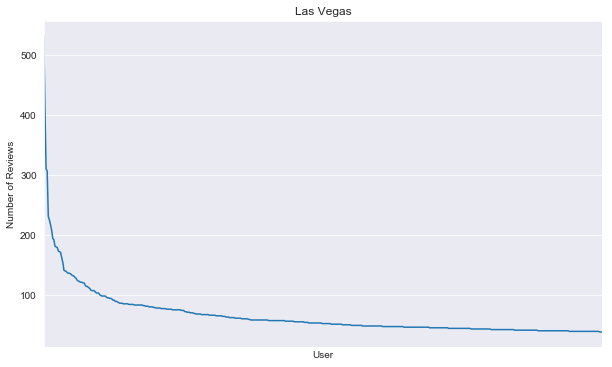

City Name: Phoenix
Reviews per user: 2.6162328812657893
Reviews per business: 101.00320821302535
Number of Users: 120336
Number of Businesses: 3117
Number of Reviews: 314827


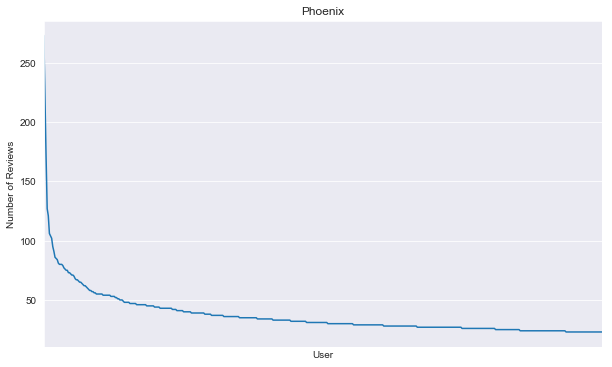

City Name: Toronto
Reviews per user: 4.090067164490426
Reviews per business: 43.74966532797858
Number of Users: 71913
Number of Businesses: 6723
Number of Reviews: 294129


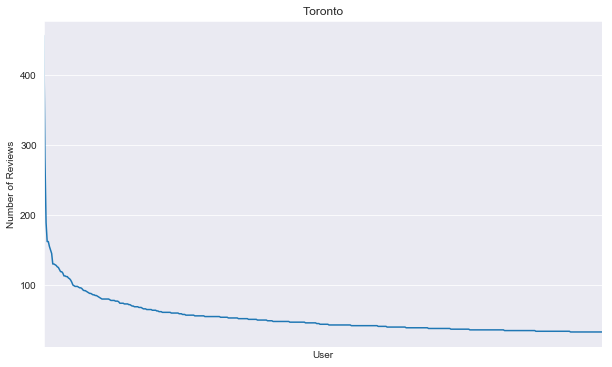

City Name: Scottsdale
Reviews per user: 2.2771967215271474
Reviews per business: 130.93192133131618
Number of Users: 76011
Number of Businesses: 1322
Number of Reviews: 173092


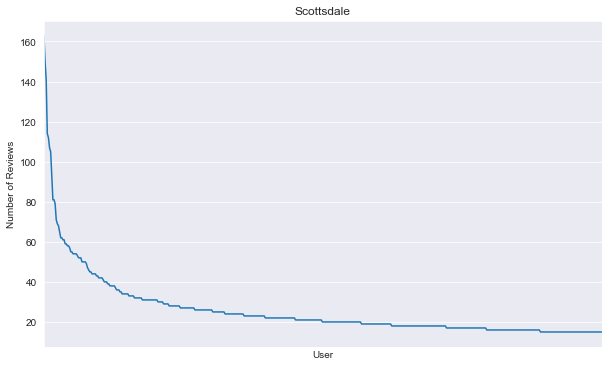

City Name: Charlotte
Reviews per user: 2.9634847154601327
Reviews per business: 70.58840304182509
Number of Users: 50116
Number of Businesses: 2104
Number of Reviews: 148518


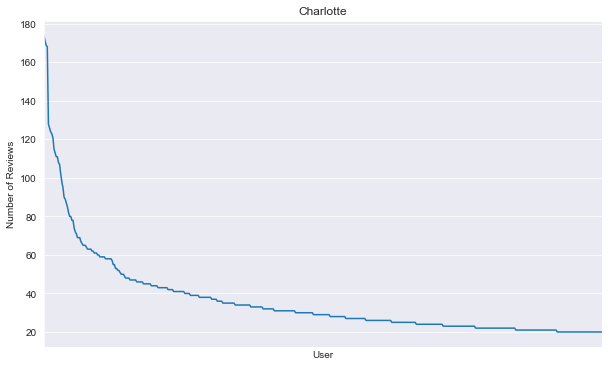

City Name: Pittsburgh
Reviews per user: 2.9504552242400885
Reviews per business: 60.31363860167405
Number of Users: 41518
Number of Businesses: 2031
Number of Reviews: 122497


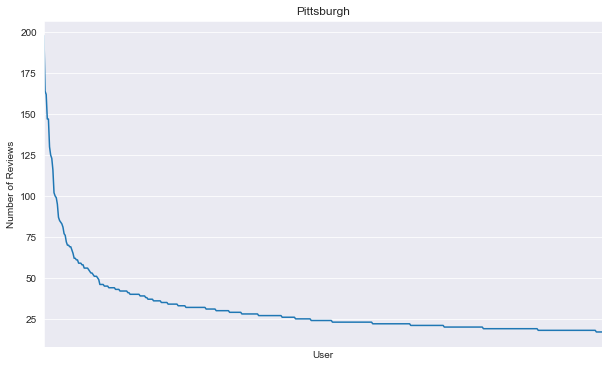

City Name: Montréal
Reviews per user: 2.8016217870257036
Reviews per business: 28.566926677067084
Number of Users: 32680
Number of Businesses: 3205
Number of Reviews: 91557


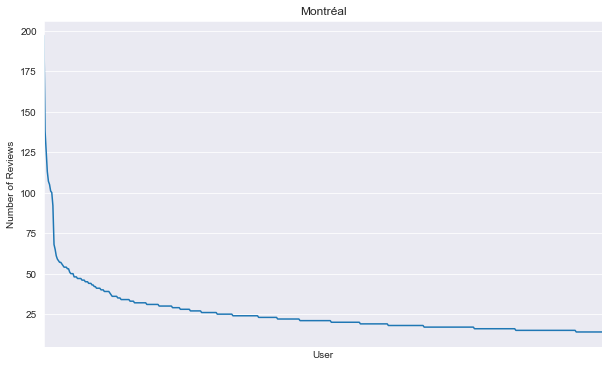

City Name: Tempe
Reviews per user: 1.9679399267069853
Reviews per business: 104.95443645083932
Number of Users: 44479
Number of Businesses: 834
Number of Reviews: 87532


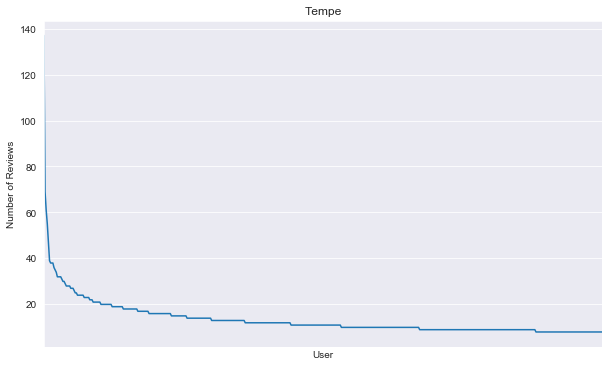

City Name: Henderson
Reviews per user: 2.0068619073513037
Reviews per business: 112.64970930232558
Number of Users: 38619
Number of Businesses: 688
Number of Reviews: 77503


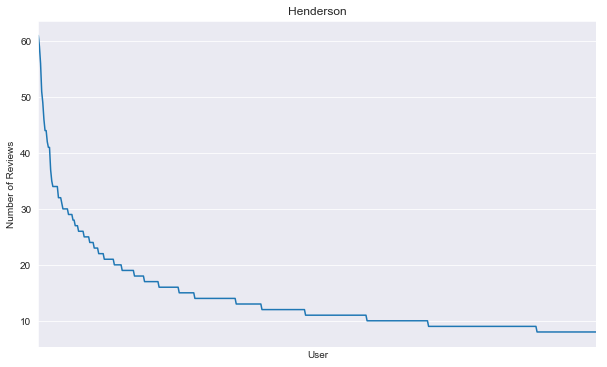

City Name: Chandler
Reviews per user: 2.0756241517533063
Reviews per business: 91.8463687150838
Number of Users: 31683
Number of Businesses: 716
Number of Reviews: 65762


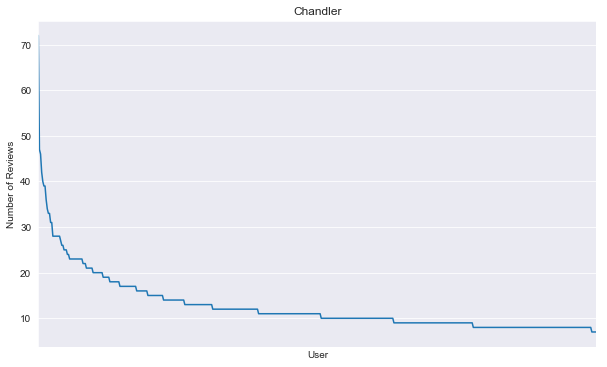

In [54]:
for i in range(0,len(city_list)):
    dfcity = df[df.city == city_list[i]]
    dfcity.groupby(['user_id','rev_stars']).size().sort_values(ascending=False)[0:500].plot()
    print(f'City Name: {city_list[i]}')
    print(f'Reviews per user: {dfcity.rev_stars.count() / len(dfcity.user_id.unique())}')
    print(f'Reviews per business: {dfcity.rev_stars.count() / len(dfcity.business_id.unique())}')
    print(f'Number of Users: {len(dfcity.user_id.unique())}')
    print(f'Number of Businesses: {len(dfcity.business_id.unique())}')
    print(f'Number of Reviews: {dfcity.rev_stars.count()}')
    plt.title(city_list[i])
    plt.xlabel('User')
    plt.ylabel('Number of Reviews')
    plt.xticks([])
    plt.show()
    

## Using NetworkX, find the restaurants that have the most number of shared users.

In [14]:
import networkx as nx

In [15]:
G = nx.Graph()

In [16]:
#adding the nodes for users and businesses
G.add_nodes_from(pit['user_id'], bipartite='user_id')
G.add_nodes_from(pit['business_id'], bipartite='business_id')
#adding edges between the users and businesses
G.add_edges_from(zip(pit['user_id'], pit['business_id']))

#Gather nodes from all partitions
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'user_id']
rest_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'business_id']

In [17]:
#create the connectivity matrix
mat = nx.bipartite.biadjacency_matrix(G,
                                     row_order=cust_nodes,
                                     column_order=rest_nodes)

In [18]:
from nxviz import CircosPlot

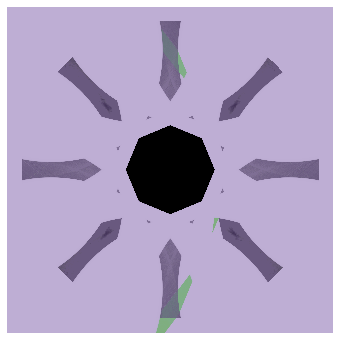

In [20]:
c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')
c.draw()
plt.show()

In [22]:
plt.savefig('phoenix_network.png')

<Figure size 720x432 with 0 Axes>

In [21]:
adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)

In [26]:
adjacency_matrix.sum()

244994

In [18]:
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")

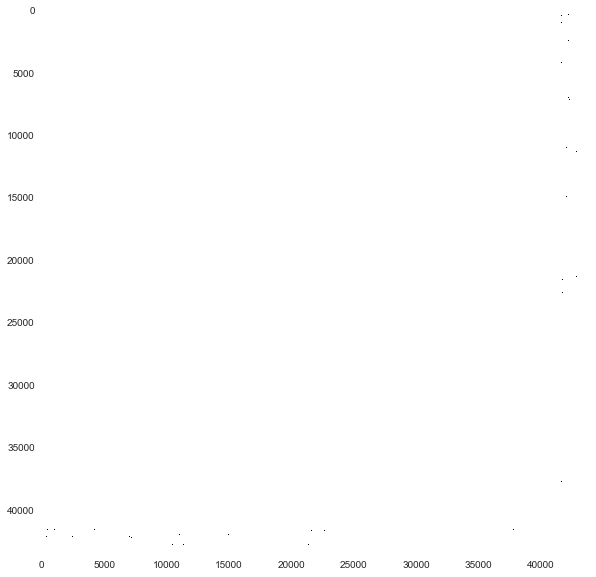

In [19]:
draw_adjacency_matrix(G)

In [120]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
con_matrix = mat @ mat.T 

In [121]:
#set the diagonal to zero and convert to coordinate matrix format
con_matrix.setdiag(0)
business_coo = con_matrix.tocoo()

In [ ]:
#find the businesses who shared the most number of users 

In [47]:
count = list(con_matrix.sum(axis=0))

In [50]:
print(count[0][0])

[[  423  6273 11523 ...   103    50     5]]


In [54]:
#use degree centrality to figure out the customer importance metric
#the higher values represent more connections to restaurants
nx.bipartite.degree_centrality(G, cust_nodes)

{'hjx3BT4QXbR8H5js251_Ow': 0.00019634792852935403,
 'KUvyfWBnBFQkS8CFnGG4xA': 0.00019634792852935403,
 'w53pb8dfRcoV6t3RSw1QAQ': 0.00039269585705870805,
 'pvmzmPs-uEWjObcJuUaWcw': 0.00019634792852935403,
 'eLVIfBOPwEw5wpcHMfW3MQ': 0.0005890437855880621,
 'd8yfvMid_qgJ2fAO8W9UFw': 0.00019634792852935403,
 'ZMqKGYb_oJpDz3HBT-nh-g': 0.00039269585705870805,
 'YOImIB91eptt0y2WVjiHqQ': 0.0007853917141174161,
 'PPT8xr_ryVlQupjbPb9Ldg': 0.00019634792852935403,
 'Z1OJOcwsWppWFOKWFusa4A': 0.00019634792852935403,
 'A1N9-N9wBnjX44Za-9AJQg': 0.0005890437855880621,
 '9vtFHK7QcLDICLLzGV90WQ': 0.00019634792852935403,
 'WrN3_iH0mrt0t1E-dETwEw': 0.0005890437855880621,
 'DhMvxB9apRacIrBrqMfc9Q': 0.00019634792852935403,
 'wM6ys83Ec1ccdkeWVI0hHQ': 0.0013744354997054782,
 'juNeYhO3yGQnTzZJDxrL3Q': 0.00019634792852935403,
 '1oSb1_MP9RR77F6Fijfftg': 0.00019634792852935403,
 'oEwXlQ0_W3AlE9vKm2ZMRA': 0.00019634792852935403,
 'r_9uZ0eE3A2mPEtn1tzKig': 0.00019634792852935403,
 'kf3SH4T-cDIvWnMQu3q_ng': 0.0001963

In [12]:
test = pd.DataFrame(columns=['users','restaurants'])

In [36]:
test.loc[5] = ['user3', 'rest3']

In [37]:
test.groupby(['restaurants', 'users']).size().unstack('restaurants')

restaurants,rest1,rest2,rest3
users,,,
user1,1.0,1.0,NaN
user2,1.0,1.0,NaN
user3,1.0,NaN,1.0


In [38]:
test.head(20)

,users,restaurants
0,user1,rest1
1,user1,rest2
2,user2,rest1
3,user2,rest2
4,user3,rest1
5,user3,rest3


In [26]:
U = nx.Graph()
U.add_nodes_from(test['users'], bipartite='users')
U.add_nodes_from(test['restaurants'], bipartite='restaurants')
U.add_edges_from(zip(test['users'],test['restaurants']))
#Gather nodes from all partitions
testC_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'users']
testR_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'restaurants']
test_mat = nx.bipartite.biadjacency_matrix(U,
                                     row_order=testC_nodes,
                                     column_order=testR_nodes)

In [31]:
#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
test_con_matrix =  test_mat.T @ test_mat

In [32]:
test_con_matrix.setdiag(0)
test_business_coo = test_con_matrix.tocoo()

In [33]:
count = list(test_con_matrix.sum(axis=0))

In [34]:
count

[matrix([[2, 2]])]